In [2]:
from Node.Node import Control_node
import numpy as np
import time
import pylab as pl
from IPython import display

### Agent
Fields:
`Agent(inputs, behavioral_model, system_estimate, reference, reference_update, sensor_function, comparator_function, controller_update, internal_model_update)`
<br/>
**inputs** - source of inputs (i.e. environment, state observations, others behaviors)
<br/>
**behavioral model** - initial matrix expressing future state given last behavior ("B" matrix)
<br/>
**system estimate** - initial matrix expressing future state given last state ("A" matrix)
<br/>
**reference** - target state 
<br/>
**reference update** - update to reference (target) signal
<br/>
**sensor function** - for taking in (and processing) observations
<br/>
**comparator function** - for comparing observation and estimate
<br/>
**controller** - for generating output
<br/>
**controller update** - for updating the behavioral matrix 
<br/>
**internal model** - for generating forward prediction
<br/>
**internal model update** - for updating the system estimate 
<br/>


![IMC](diagram.png)

In [21]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[.1,0],
               [0,0.1]])
B2 = np.array([[0,0],
               [0,0]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[0.4,0],
               [0,0.4]])
A2 = np.array([[0.4,0],
               [0,0.4]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.3,0.7])
R2 = np.array([0,0])

# Initial behavior
behav_1 = np.array([0.6,0.6])


# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    output = behavioral_model @ error
    return output


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate @ previous_state) + (behavioral_model @ previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    error = curr_system_est - inputs
    #learning_rate = 0.01
    system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate







# agent two acts as the plant (error = control output)
def plant_control(error, behavioral_model, previous_output):
    output = previous_output + error
    return output

# just get the control output
def plant_compare(sensory_signal, reference, prediction):
    error = sensory_signal
    return error
    

### Single Agent

A single control node exerts (proportional) control to reach the red reference state. The blue points signify the output of the plant node, which takes control commands of the "agent" node and applies the commands to the previous state, creating motion towards the reference.

In [12]:
agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
plant = Control_node(sensor=sense, comparator=plant_compare, control_update=control_update,  controller = plant_control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_1)


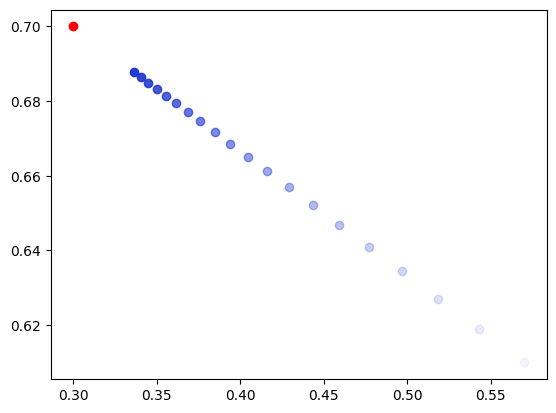

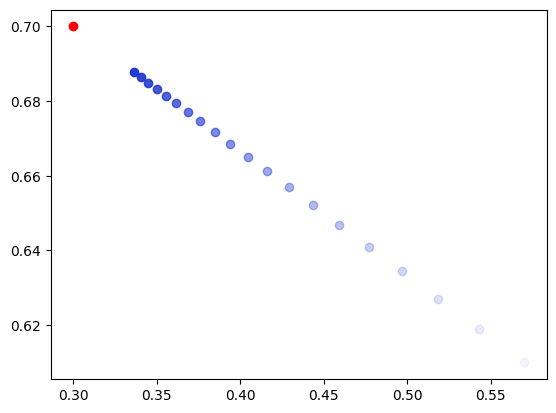

In [13]:
%matplotlib inline
trials = 20
#time = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
behavior1 = np.array([0,0])
controller_error = []
agent1_behaviors = []
plant_outputs = []

state = np.array([0.6,0.6])
agent1_error = []

pl.scatter(R1[0],R1[1], c='red')
for t in range(trials):
    b1 = agent1.go(state)   
    plant_output = plant.go(b1)

    agent1_behaviors.append(agent1.get_output())
    plant_outputs.append(plant.get_output())
    controller_error.append(agent1.get_error())
    agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    behavior1 = b1
    state = plant_output
    
    color = [0.1,0.2,0.8, (t+1)/(trials+1)]
    pl.scatter(plant_output[0],plant_output[1],c=tuple(color))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.5)

In [14]:
for t in range(trials):
    print(t)
    print("REFERENCE")
    print(R1)
    print("CONTROLLER ERRORS")
    print(controller_error[t])
    print(agent1_error[t])
    print("CONTROLLER OUTPUTS")
    print(agent1_behaviors[t])
    print("PLANT OUTPUTS")
    print(plant_outputs[t])
    print("\n")

    

0
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.3  0.1]
0.19999999999999998
CONTROLLER OUTPUTS
[-0.03  0.01]
PLANT OUTPUTS
[0.57 0.61]


1
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.27  0.09]
0.17999999999999997
CONTROLLER OUTPUTS
[-0.027  0.009]
PLANT OUTPUTS
[0.543 0.619]


2
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.243  0.081]
0.16199999999999995
CONTROLLER OUTPUTS
[-0.0243  0.0081]
PLANT OUTPUTS
[0.5187 0.6271]


3
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.2187  0.0729]
0.14579999999999996
CONTROLLER OUTPUTS
[-0.02187  0.00729]
PLANT OUTPUTS
[0.49683 0.63439]


4
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.19683  0.06561]
0.13121999999999995
CONTROLLER OUTPUTS
[-0.019683  0.006561]
PLANT OUTPUTS
[0.477147 0.640951]


5
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.177147  0.059049]
0.11809799999999993
CONTROLLER OUTPUTS
[-0.0177147  0.0059049]
PLANT OUTPUTS
[0.4594323 0.6468559]


6
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.1594323  0.0531441]
0.10628819999999994
CONTROLLER OUTPUTS
[-0.01594

### 2 Agents Interact

Instead of one node acting as a plant, two control nodes now exchange control commands with a shared reference state shown in red. Control is exerted by the product of the behavioral matrix and the error (reference - current state) plus the current state.

In [44]:
B2 = np.array([[0,1],
               [-1,0]])
R2 = np.array([0.3,0.7])
behav_1 = np.array([0.9,0.9])
behav_2 = np.array([0.4,0.9])

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    output = (behavioral_model @ error) + previous_output
    return output


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update,  controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_2)


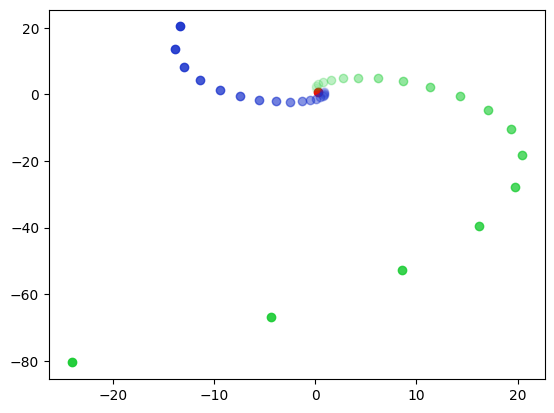

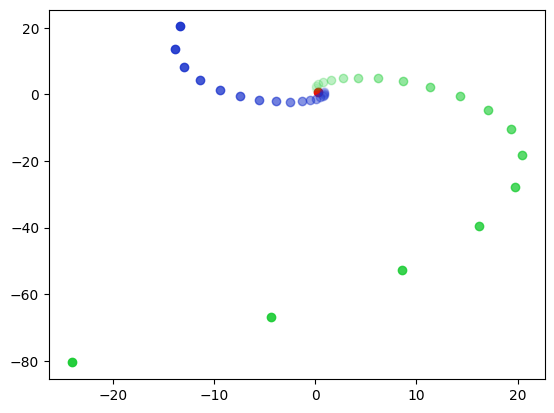

In [45]:
%matplotlib inline
trials = 20
#time = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
behavior1 = np.array([0.5,0.7])
b2 = np.array([0.7,0.8])
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

pl.scatter(R1[0],R1[1], c='red')
for t in range(trials):
    b1 = agent1.go(b2)   
    b2 = agent2.go(b1)

    agent1_behaviors.append(agent1.get_output())
    agent2_behaviors.append(agent2.get_output())

    agent1_error.append(agent1.get_error())
    agent2_error.append(agent2.get_error())
    #agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    behavior1 = b1
    behavior2 = b2
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],b1[1],c=tuple(color1))
    pl.scatter(b2[0],b2[1],c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.5)

In [46]:
for t in range(trials):
    print(t)
    print("REFERENCE")
    print(R1)
    print("CONTROLLER ERRORS")
    print(agent1_error[t])
    print(agent2_error[t])
    print("CONTROLLER OUTPUTS")
    print(agent1_behaviors[t])
    print(agent2_behaviors[t])
    print("\n")

0
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.4 -0.1]
[-0.56 -0.19]
CONTROLLER OUTPUTS
[0.86 0.89]
[0.21 1.46]


1
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[ 0.09 -0.76]
[-0.569 -0.114]
CONTROLLER OUTPUTS
[0.869 0.814]
[0.096 2.029]


2
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[ 0.204 -1.329]
[-0.5894  0.0189]
CONTROLLER OUTPUTS
[0.8894 0.6811]
[0.1149 2.6184]


3
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[ 0.1851 -1.9184]
[-0.60791  0.21074]
CONTROLLER OUTPUTS
[0.90791 0.48926]
[0.32564 3.22631]


4
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.02564 -2.52631]
[-0.605346  0.463371]
CONTROLLER OUTPUTS
[0.905346 0.236629]
[0.789011 3.831656]


5
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.489011 -3.131656]
[-0.5564449  0.7765366]
CONTROLLER OUTPUTS
[ 0.8564449 -0.0765366]
[1.5655476 4.3881009]


6
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-1.2655476 -3.6881009]
[-0.42989014  1.14534669]
CONTROLLER OUTPUTS
[ 0.72989014 -0.44534669]
[2.71089429 4.81799104]


7
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-2.4108942